# 2. 머신러닝 프로젝트 처음부터 끝까지

__참고:__ 오렐리앙 제롱의 [<핸즈온 머신러닝(3판)>](https://github.com/ageron/handson-ml3)
2장의 소스코드를 사용합니다.

**기본 설정**

파이썬 3.7 이상을 요구한다.

In [1]:
import sys
assert sys.version_info >= (3, 7)

사이킷런 1.0.1 이상을 요구한다.

In [2]:
import sklearn
assert sklearn.__version__ >= "1.0.1"

랜덤 시드 지정은 무작위성을 이용하는 머신러닝 코드를 실행할 때 매번 동일한 결과를 얻기 위해 사용된다.

In [3]:
import numpy as np

np.random.seed(42)

## 2.1. 실전 데이터 활용

## 2.2. 큰 그림 그리기

## 2.3. 데이터 구하기

캘리포니아 주의 구역별 주택 중위가격을 예측하는 모델을 훈련시키려 한다.
이를 위해 먼저 데이터를 다운로드하고 적재한다.

### 데이터 다운로드

아래 코드의 `load_housing_data()` 함수는 지정된 깃허브 리포지토리에 압축파일로 저장되어 있는 캘리포니아 주택가격 데이터를 다운로드한 후에 Pandas 데이터프레임으로 변환하여 반환한다. 따라서 `housing` 변수는 캘리포니아 주택가격 데이터를 담고 있는 데이터프레임을 가리킨다.

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")                      # 파일 저장 경로. 파일명 함께 지정.
    if not tarball_path.is_file():                                   # 아직 다운로드하지 않은 경우
        Path("datasets").mkdir(parents=True, exist_ok=True)          # 폴더 생성
        url = "https://github.com/ageron/data/raw/main/housing.tgz"  # 파일 다운로드
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:          # tgz 파일 압축 풀기
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))         # 압축 풀린 csv 파일 불러오기

housing = load_housing_data()

## 2.4. 데이터 탐색과 시각화

### 2.4.1. 데이터프레임과 데이터 탐색

**`head()` 메서드: 데이터프레임에 포함된 처음 5 개의 샘플 확인**

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**`info()` 메서드: 데이터셋 정보 요약**

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**범주형 특성 탐색: `value_counts()` 메서드**

`object`를 자료형(`Dtype`)으로 갖는 `ocean_procimity`(해안 근접도) 특성은 범주형 특성이다.

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**수치형 특성 탐색: `describe()` 메서드**

나머지 특성은 모두 수치형 특성이다.

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**그래프 기본 설정**

다음은 이미지에 포함된 폰트 크기를 설정한다.

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

이지를 저장할 폴더를
현재 디렉토리 아래의 `images/end_to_end_project` 디렉토리로 지정한다.

In [10]:
# 이미지 파일 저장 경로

IMAGES_PATH = Path() / "images" / "end_to_end_project" # 이미지 파일 저장 디렉토리 지정
IMAGES_PATH.mkdir(parents=True, exist_ok=True)         # 디렉토리 생성

**수치형 특성별 히스토그램**

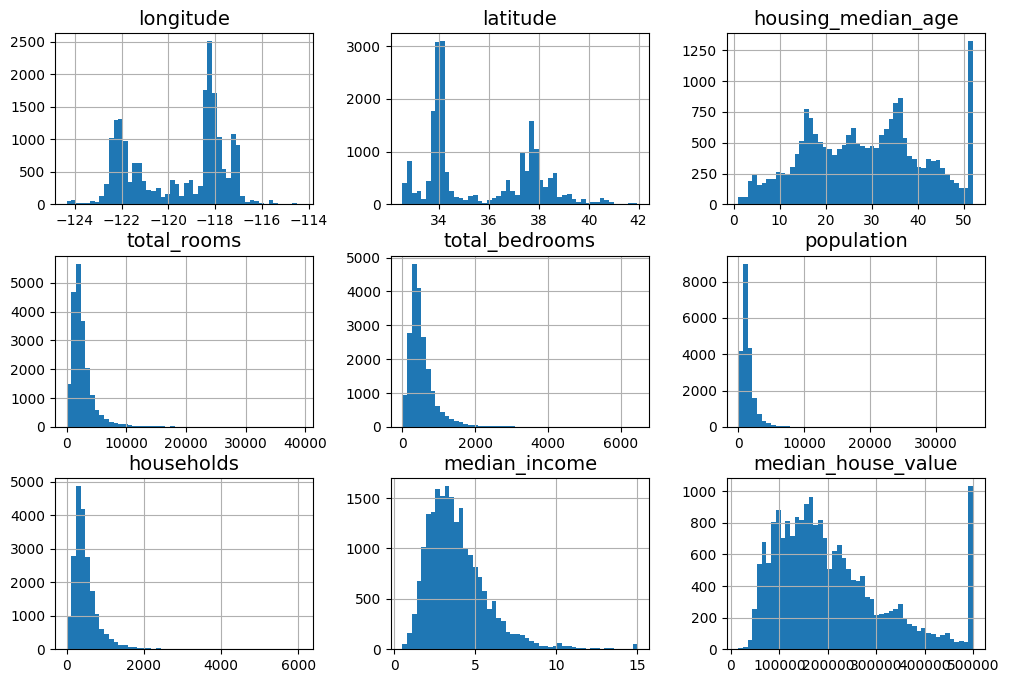

In [11]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

### 2.4.2. 훈련셋과 테스트셋

훈련셋과 테스트셋을 구분하기 위해 `train_test_split()` 함수를 이용한다.

In [12]:
from sklearn.model_selection import train_test_split

무작위로 데이터의 20% 정도를 테스트셋으로 지정할 수 있다.

```python
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
```

하지만 여기서는 소득 계층을 고려하면서 훈련셋과 테스트셋을 분류한다.

**계층 샘플링**

계층 샘플링을 위해 대부분 구역의 중위소득이 1.5 ~ 6.0, 즉 15,000 달러에서 60,000 달러 사이라는 사실에 주목하고 소득 구간을 아래 5개로 구분한다.

```python
[0, 1.5, 3.0, 4.6, 6.0, np,inf]
```

<Axes: >

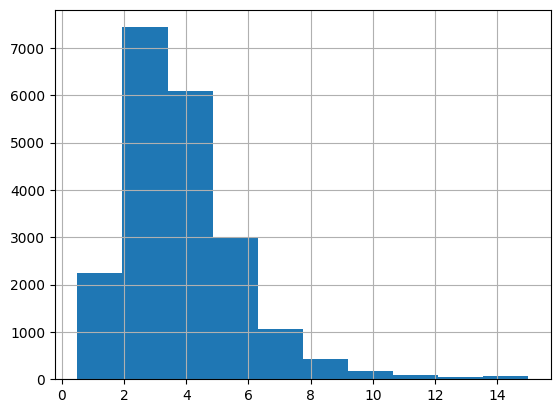

In [13]:
housing['median_income'].hist()

소득 구간을 새로운 범주형 특성으로 추가한다.

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [15]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


소득 구간별 히스트로그램은 다음과 같다.

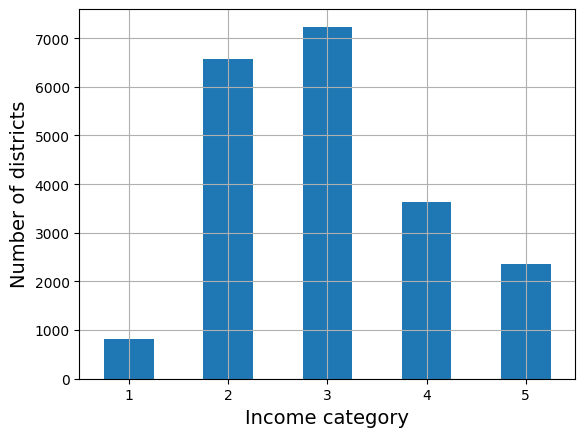

In [16]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

소득을 기준으로 계층 샘플링을 진행한다.

- `stratify=housing["income_cat"]` 키워드 인자 활용

In [17]:
strat_train_set, strat_test_set = train_test_split(housing,
                                                   test_size=0.2,
                                                   stratify=housing["income_cat"],
                                                   random_state=42)

계층 샘플링은 모집단의 비율을 거의 그대로 유지하지만
무작위 추출은 비율이 좀 더 많이 달라진다.

아래 함수는 데이터셋에 포함된 소득 구간별 크기 비율을 계산한다.

In [18]:
# 소득 구간별 비율 계산
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

계층 샘플링의 정확도를 평가하기 위해 무작위 샘플링 결과를 이용한다.

In [19]:
# 비교 대상: 무작위 샘플링
train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       random_state=42)

계층 샘플링과 무작위 샘플링의 결과를 비교한다.

In [20]:
compare_props = pd.DataFrame({"전체(%)": income_cat_proportions(housing),
                              "계층 샘플링(%)": income_cat_proportions(strat_test_set),
                              "무작위 샘플링(%)": income_cat_proportions(test_set)})
compare_props.sort_index()

compare_props.index.name = "소득 구간"
compare_props["계층 샘플링 오류율(%)"] = (compare_props["계층 샘플링(%)"] /
                                          compare_props["전체(%)"] - 1)
compare_props["무작위 샘플링 오류율(%)"] = (compare_props["무작위 샘플링(%)"] /
                                            compare_props["전체(%)"] - 1)

(compare_props * 100).round(2)

,전체(%),계층 샘플링(%),무작위 샘플링(%),계층 샘플링 오류율(%),무작위 샘플링 오류율(%)
소득 구간,,,,,
3,35.06,35.05,34.52,-0.01,-1.53
2,31.88,31.88,30.74,-0.02,-3.59
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63
1,3.98,4.00,4.24,0.36,6.45


**데이터 되돌리기**

계층 샘플링을 이용하여
훈련셋과 테스트셋을 구분하기 위해 사용된 `income_cat` 특성은
모델 훈련에 필요없기에 삭제한다.

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 2.4.3. 데이터 시각화

훈련셋만을 대상으로 탐색과 시각화를 적용한다.
먼저 훈련셋 원본을 그대로 두고 복사해서 사용한다.

In [22]:
housing = strat_train_set.copy()

**지리적 데이터 시각화**

* `grid` 키워드 인자 활용

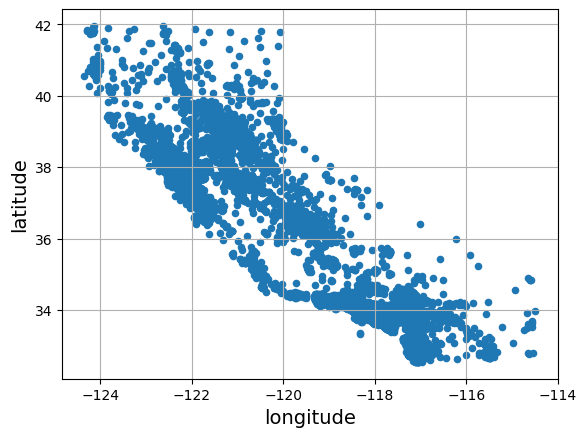

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

* `alpha` 키워드 인자 활용: 투명도를 조절하여 구역이 밀집되어 모여있는 정도를 보다 선명하게 보여줌.

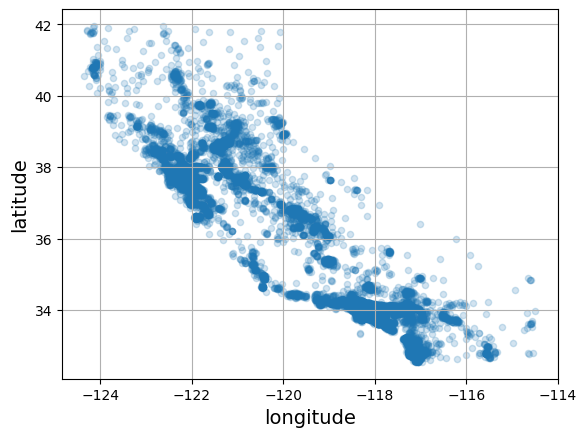

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

* 주택 중위가격을 색상으로 활용하기
    * `s=housing["population"] / 100`: 구역별 인구수에 비례해서 원의 크기 지정
    * `c="median_house_value"`: 주택 중위가격을 색상 지정에 이용
    * ` cmap="jet"`: [colormap 지정](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
    * `sharex=False` : x-축의 눈금 값과 범례를 표시하지 못하는 버그 수정 용도이며 임시 방편 해결책임
        참고: https://github.com/pandas-dev/pandas/issues/10611

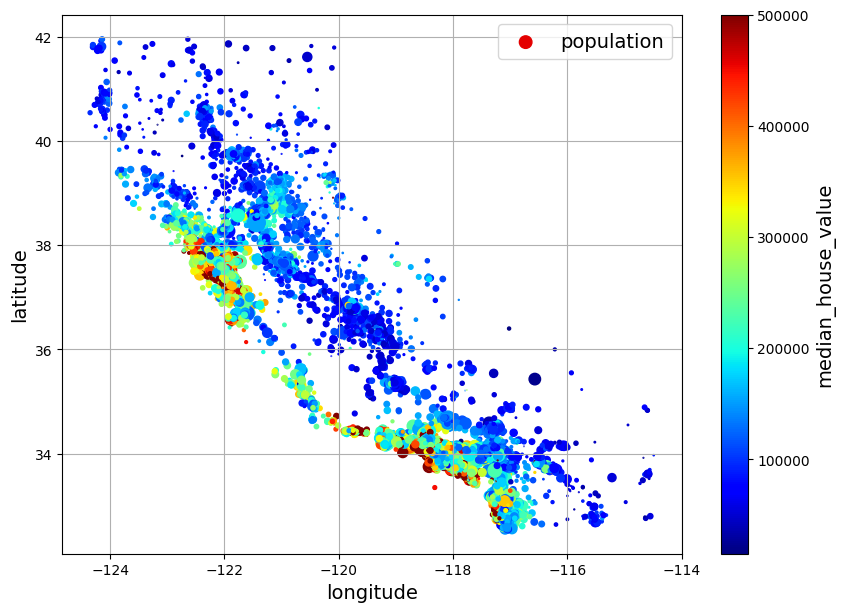

In [25]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value",
             cmap="jet",
             colorbar=True,
             legend=True,
             sharex=False,
             figsize=(10, 7))
plt.show()

* 캘리포니아 지도와 합치기

In [26]:
# 캘리포니아 지도 다운로드
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

지도 표기에 사용되는 특성 이름을 수정한다.

In [27]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})

다운로드한 캘리포니아 지도와 위도/경도를 이용한 산포도를 함께 그린다.

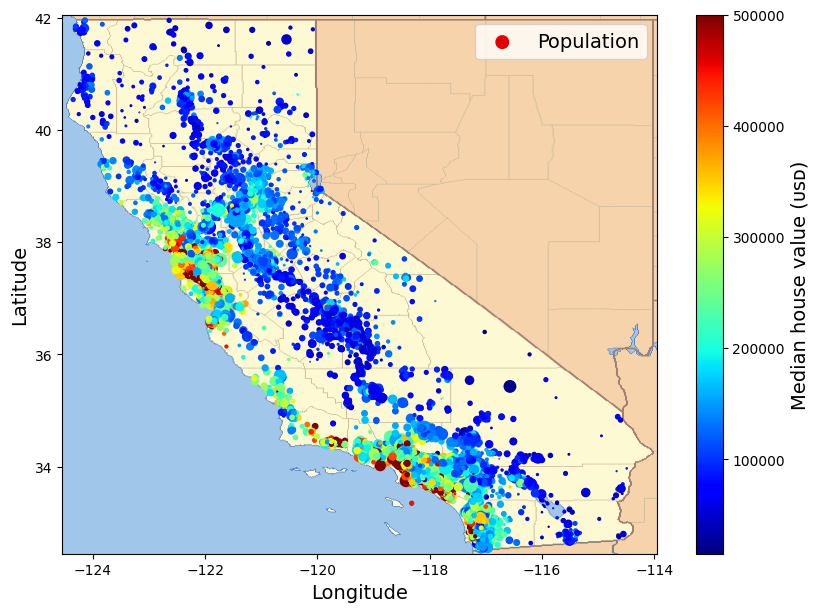

In [28]:
# 위도/경도를 이용한 구역별 인구 산포도
housing_renamed.plot(kind="scatter",
                     x="Longitude",
                     y="Latitude",
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Median house value (ᴜsᴅ)",
                     cmap="jet",
                     colorbar=True,
                     legend=True,
                     sharex=False,
                     figsize=(10, 7))

# 다운로드된 캘리포티아 지도
california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05  # x축, y축 눈금
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

**상관관계**

* 모든 수치형 특성 간의 표준 상관계수 계산

In [29]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


* 주택 중위가격과 다른 특성 간의 상관관계 확인
* `sort_values()` 메서드: 값을 기준으로 정렬하기

In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

* 특성들 사이의 상관관계를 나타내는 산점도

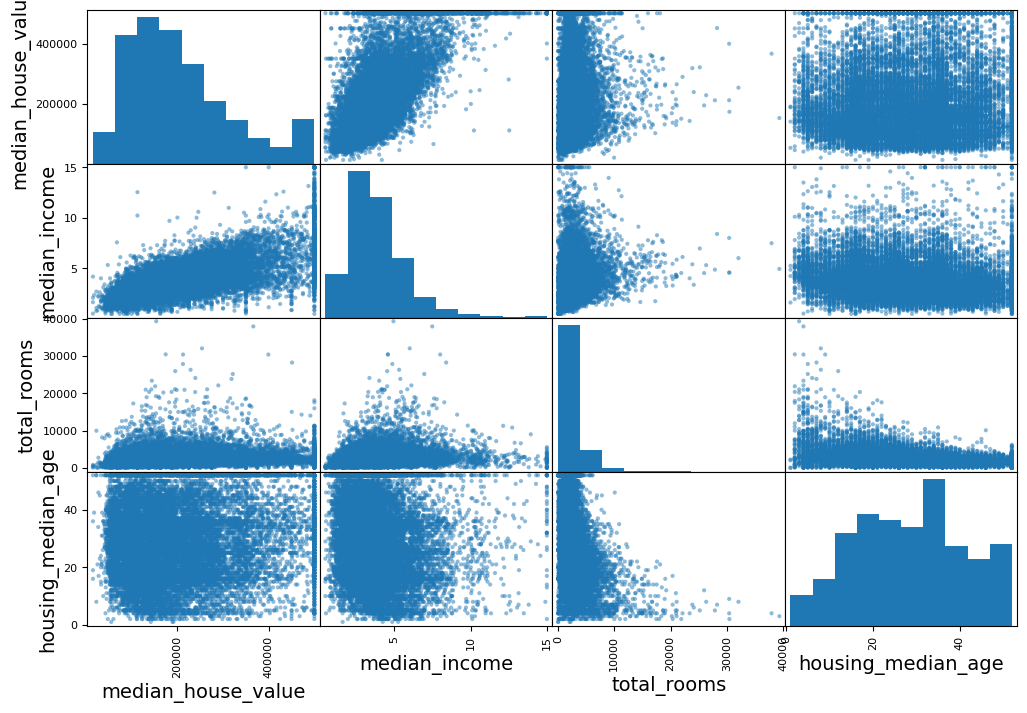

In [31]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

* 중위소득 대 주택 중위가격 산점도

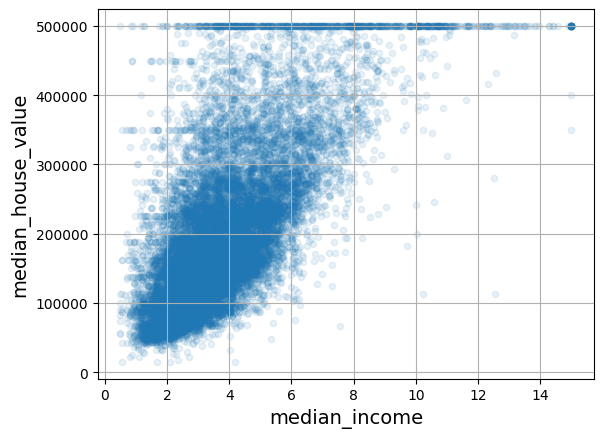

In [32]:
housing.plot(kind="scatter",
             x="median_income",
             y="median_house_value",
             alpha=0.1,
             grid=True)
plt.show()

## 2.5. 데이터 준비: 정제와 전처리

**데이터 정제**

`total_bedrooms` 특성에 존재하는 결측치 처리법을 결정한다.

- 결측치가 있는 샘플의 인덱스 확인 마스크(mask)

In [33]:
null_rows_idx = housing.isnull().any(axis=1)

In [34]:
null_rows_idx

13096    False
14973    False
3785     False
14689    False
20507    False
         ...  
14207    False
13105    False
19301    False
19121    False
19888    False
Length: 16512, dtype: bool

결측치가 있는 샘플을 확인한다.

In [35]:
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,85900.0,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,150400.0,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,161200.0,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,500001.0,<1H OCEAN


총 168개의 샘플에 결측치가 존재한다.

In [36]:
housing.loc[null_rows_idx].shape

(168, 10)

결측치 처리 방법은 일반적으로 다음 세 가지 중에 하나를 사용한다.

* 방법 1: 결측치 특성 포함 샘플 삭제

    ```
    housing.dropna(subset=["total_bedrooms"], inplace=True)  # 옵션 1
    ```

* 방법 2: 결측치를 포함한 특성 삭제

    ```
    housing.drop("total_bedrooms", axis=1, inplace=True)  # 옵션 2
    ```

* 방법 3: 결측치를 해당 특성의 중앙값/평균값 등으로 대체. 아래 코드는 중앙값(median) 활용

    ```
    # 중앙값으로 대체
    median = housing["total_bedrooms"].median()
    housing["total_bedrooms"].fillna(median, inplace=True)  # 옵션 3
    ```

### 2.5.1. 사이킷런 API

### 2.5.2. SimpleImputer 변환기: 결측치 처리

`SimpleImputer` 변환기를 활용하면 방법 3을 쉽게 처리할 수 있다.
아래 코드는 특성별 중앙값을 계산해서 모든 결측치를 중앙값으로 대체하는 변환기를 선언한다.

- `strategy` 속성: 결측치를 대체할 방식을 지정. 평균('mean'), 중앙값('median'), 최빈값('most_frequent'), 상숫값('constant') 중 하나 선택

In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

중앙값이 수치형 특성에서만 계산될 수 있기 때문에 수치형 특성만을 대상으로 `SimpleImputer` 변환기를 적용한다.

In [38]:
housing_num = housing.select_dtypes(include=[np.number])

`SimpleImputer` 변환기의 `fit()` 메서드는 `strategy` 속성에 따라 계산된 특성별 평균값, 중앙값, 최빈값 등을 변환기 자체의 `statistics_` 속성에 저장한다.

In [39]:
imputer.fit(housing_num)

imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1250e+03,  4.3400e+02,
        1.1670e+03,  4.0800e+02,  3.5385e+00,  1.7920e+05])

이제 `transform()` 메서드를 실행하여 수치형 특성에 포함된 결측치를 모두 특성별 중앙값으로 대체한다.
변환된 데이터셋은 **넘파이 어레이** 자료형으로 반환된다.

In [40]:
X = imputer.transform(housing_num)
X

array([[-1.22420e+02,  3.78000e+01,  5.20000e+01, ...,  1.03400e+03,
         2.09870e+00,  4.58300e+05],
       [-1.18380e+02,  3.41400e+01,  4.00000e+01, ...,  3.57000e+02,
         6.08760e+00,  4.83800e+05],
       [-1.21980e+02,  3.83600e+01,  3.30000e+01, ...,  2.03000e+02,
         2.43300e+00,  1.01700e+05],
       ...,
       [-1.17060e+02,  3.25900e+01,  1.30000e+01, ...,  7.60000e+02,
         4.06160e+00,  1.48800e+05],
       [-1.18400e+02,  3.40600e+01,  3.70000e+01, ...,  8.38000e+02,
         4.14550e+00,  5.00001e+05],
       [-1.22410e+02,  3.76600e+01,  4.40000e+01, ...,  2.12000e+02,
         3.28330e+00,  2.33300e+05]])

**참고:** `fit()`과 `transform()` 메서드를 연속 적용하는
`fit_transform()` 메서드를 실행해도 동일한 결과를 얻는다.

In [41]:
X = imputer.fit_transform(housing_num)
X

array([[-1.22420e+02,  3.78000e+01,  5.20000e+01, ...,  1.03400e+03,
         2.09870e+00,  4.58300e+05],
       [-1.18380e+02,  3.41400e+01,  4.00000e+01, ...,  3.57000e+02,
         6.08760e+00,  4.83800e+05],
       [-1.21980e+02,  3.83600e+01,  3.30000e+01, ...,  2.03000e+02,
         2.43300e+00,  1.01700e+05],
       ...,
       [-1.17060e+02,  3.25900e+01,  1.30000e+01, ...,  7.60000e+02,
         4.06160e+00,  1.48800e+05],
       [-1.18400e+02,  3.40600e+01,  3.70000e+01, ...,  8.38000e+02,
         4.14550e+00,  5.00001e+05],
       [-1.22410e+02,  3.76600e+01,  4.40000e+01, ...,  2.12000e+02,
         3.28330e+00,  2.33300e+05]])

모델 훈련에 필수사항은 아니지만 편의상 팬다스의 데이터프레임을 이용하면 보다 보기가 좋다.
데이터프레임으로 형변환시키기 위해 특성 이름을 활용한다.

이제 `total_bedrooms` 특성에 포함된 5개의 결측치가 중앙값 434.0으로 채워진 것을 확인할 수 있다.



In [42]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [43]:
# total_bedrooms 특성에 결측치를 포함했던 5개 샘플
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,85900.0
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,150400.0
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,161200.0
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,410700.0
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,500001.0


### 2.5.3. 입력 데이터셋과 타깃 데이터셋

주택 중위가격을 타깃값(레이블)으로 지정한다.

- `housing`: 주택 중위가격 특성을 제외한 데이터를
    지도 학습에 필요한 입력 데이터셋으로 사용하기 위해
    변수가 가리키는 값을 변경
- `housing_labels`: 주택 중위가격은 지도 학습의 타깃으로 활용

In [44]:
# 입력 데이터셋 지정
housing = strat_train_set.drop("median_house_value", axis=1)
# 타깃 데이터셋 지정
housing_labels = strat_train_set["median_house_value"].copy()

### 2.5.4. OneHotEncoder 변환기: 범주형 특성 전처리

해안 근접도(`ocean_proximity`)는 문자열을 사용한다.

In [45]:
housing_cat = housing[["ocean_proximity"]]

**`OneHotEncoder` 클래스**

- 범주 수 만큼의 새로운 특성 추가
- 해당되는 범주와 관련된 특성값은 1, 나머지 특성값은 0.

In [46]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

원-핫-인코딩 변환기의 `transform()` 메서드는 기본적으로
**희소 행렬**<font size="2">sparse matrix</font>을 반환한다.

In [47]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

`toarray()` 메서드가 희소 행렬을 밀집 배열<font size="2">dene matrix</font>로 변환한다.

In [48]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

처음부터 `OneHotEncoder` 변환기의 `sparse_output=False` 하이퍼파라미터를 사용하면 밀집 행렬이 생성된다.

In [49]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

**변환기의 속성과 메서드**

변환에 사용된 범주들은 변환기의 `categories_` 속성에 저장된다.

In [50]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

변환된 특성의 이름은 변환기의 `feature_names_in_` 속성에 저징된다.

In [51]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

변환된 각 특성들에 대한 새로운 특성명은 `get_feature_names_out()` 메서드가 확인해준다.

In [52]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

변환기의 반환값은 기본적으로 넘파이 어레이 자료형이다.
따라서 훈련에 반드시 필요하지는 않지만
변환된 데이터셋을 특성명을 함께 표현하고 확인하고 싶을 때
데이터프레임으로 표현하면 좋다.
이를 위해 새로 생성된 특성명과 기존의 인덱스를 이용한다.

In [53]:
housing_cat_onehot = pd.DataFrame(housing_cat_1hot,
                                  columns=cat_encoder.get_feature_names_out(),
                                  index=housing_cat.index)

housing_cat_onehot

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


### 2.5.5. MinMaxScaler와 StandardScaler 변환기: 수치형 특성 스케일링

* 정규화: min-max 스케일링

In [54]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

* 표준화

In [55]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

### 2.5.6. `FunctionTransformer` 변환기

`FunctionTransformer`는 `fit()` 메서드를 사용하지 않고 바로
`transform()` 메서드를 적용하는 변환기를 생성할 때 활용한다.

**로그 변환기**

구역별 인구 특성 등 한쪽으로 치우친 특성에 로그 함수를 적용한다.

In [56]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, feature_names_out="one-to-one")

**비율 계산 변환기**

가구당 인원, 가구당 방 수, 침실 비율 등 비율과 관련된 새로운 특성을 생성할 때 사용한다.

아래 코드는 1번 특성을 기준으로 0번 특성의 비율을 값으로 갖는 특성을 생성하는 변환기를 정의한다.

In [57]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])

### 2.5.7. 군집 변환기: 사용자 정의 변환기

군집 유사도 적용 변환기는 직접 구현해야 한다.
단, 변환기를 정의할 때 `BaseEstimator` 클래스와 `TransformerMixin` 클래스를 상속하도록 함에 주의한다.
그래야 변환기의 기본 기능을 모두 갖추게 된다.

**주의사항:** 아래 코드를 군집화 모델인 KMeans를 활용한다.
하지만 관련 지식이 없어 이해하지 못해도 상관 없다.
여기서는 사용자가 임의로 변환기를 생성할 수 있다는 사실만 기억해도 된다.

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    # 군집화
    def fit(self, X, y=None, sample_weight=None): # sample_weight: 샘플별로 가중치 적용
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # fit() 함수의 반환값은 언제나 self!

    # fit() 이 찾아낸 군집별 유사도를 새로운 특성으로 추가
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    # 새롭게 생성된 특성 이름
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

구역별 중앙 주택 가격을 샘플 가중치로 지정한 후에 10개의 군집을 생성한다.
즉, 비싼 주택 가격을 갖는 구역을 중요시하며 따라서 센트로이드로 지정될 가능성을 높인다.

`transform()` 메서드는 각 샘플과 10개의 센트로이드 사이의 유사도 점수를 계산한다.
계산된 유사도 점수는 새로운 10개의 특성으로 추가해서 캘리포니아 구역별 주택 가격 예측에 활용한다.

In [59]:
housing['median_income']

13096    2.0987
14973    6.0876
3785     2.4330
14689    2.2618
20507    3.5292
          ...  
14207    4.7105
13105    2.5733
19301    4.0616
19121    4.1455
19888    3.2833
Name: median_income, Length: 16512, dtype: float64

In [60]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing['median_income'])

처음 5 개 샘플과 각 센트로이드에 대한 유사도 점수는 다음과 같다.

In [61]:
similarities[:5].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.97, 0.  , 0.61],
       [0.6 , 0.  , 0.99, 0.  , 0.  , 0.  , 0.03, 0.  , 0.12, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.45, 0.  , 0.74, 0.  , 0.31],
       [0.68, 0.  , 0.21, 0.  , 0.  , 0.  , 0.52, 0.  , 0.  , 0.  ],
       [0.82, 0.  , 0.89, 0.  , 0.  , 0.  , 0.13, 0.  , 0.03, 0.  ]])

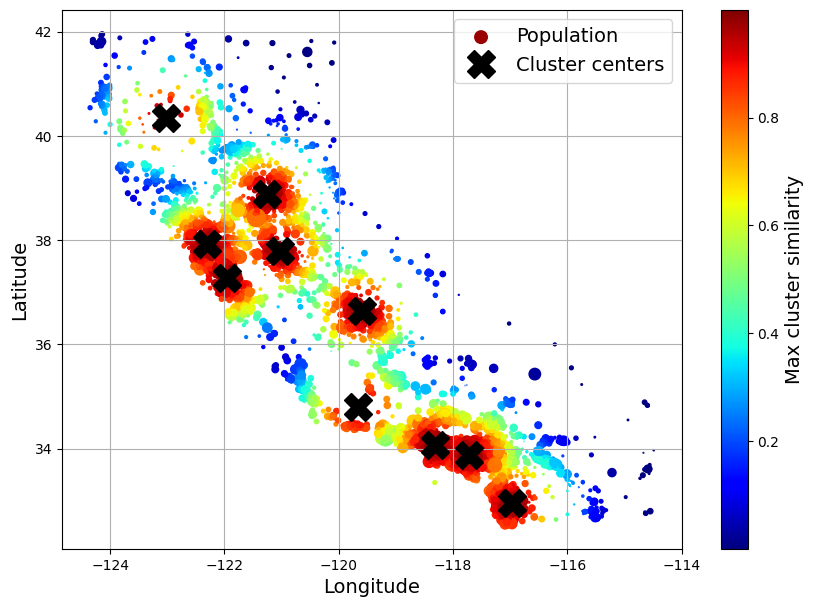

In [62]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

## 2.6. 파이프라인

### 2.6.1. `Pipeline` 클래스

**수치형 특성 변환 기본 파이프라인**

In [63]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

**`make_pipeline()` 함수 활용**

`make_pipeline()` 함수를 이용할 수도 있다.
단, 각 변환기의 이름은 자동으로 생성된다.

In [64]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler())

**파이프라인 활용 예제**

파이프라인 활용법은 변환기/예측기 활용법과 동일하다.

In [65]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

모델 훈련에 필요한 건 아니지만
변환된 넘파이 어레이를 데이터프레임으로 변환하기 위해서는
행과 칸의 이름을 지정하면 된다.
특성명은 파이프라인의 `get_feature_names_out()` 메서드로 확인한다.
그런데 파이프라인에 포함된 두 변환기 모두 기존의 특성명을 그대로 유지한다.

In [66]:
num_pipeline.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [67]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared,
                                       columns=num_pipeline.get_feature_names_out(),
                                       index=housing_num.index)

df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,2.185112
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,2.406254
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,-0.907406
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,-0.955971
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,1.348242


### 2.6.2. `ColumnTransformer` 클래스

특성별로 파이프라인을 지정할 수 있다.

In [68]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# 범주형 특성 파이프라인
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# 수치형과 범주형을 구별하여 파이프라인 구성
preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

**`make_column_transformer()` 함수 활용**

지정된 자료형을 사용하는 특성들만을 뽑아주는 make_column_selector() 함수를 유용하게 활용할 수 있다.
`make_column_selector()` 함수는 파이프라인을 적용할 특성을 선택하는 데 사용한다.


In [69]:
from sklearn.compose import make_column_selector

preprocessing = ColumnTransformer([("num", num_pipeline, make_column_selector(dtype_include=np.number)),
                                   ("cat", cat_pipeline, make_column_selector(dtype_include=object))])

사용법은 하나의 변환기를 사용법과 동일하다.

In [70]:
housing_prepared = preprocessing.fit_transform(housing)

변환된 각 특성에 대해 새로운 이름이 지정된다.
특성명은 각 파이프라인의 이름과 기존의 특성명이 `__`로 연결되는
방식으로 지어진다.

In [71]:
preprocessing.get_feature_names_out()

array(['num__longitude', 'num__latitude', 'num__housing_median_age',
       'num__total_rooms', 'num__total_bedrooms', 'num__population',
       'num__households', 'num__median_income',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN'], dtype=object)

`make_column_transformer()` 함수는 `make_pipeline()` 함수와 유사한 방식으로 작동하며
`ColumnTransformer` 객체를 생성한다.

In [72]:
from sklearn.compose import make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),     # np.object 대신 object 사용
)

In [73]:
housing_prepared = preprocessing.fit_transform(housing)

특성명은 여전히 각 파이프라인의 이름과 기존의 특성명이 `__`로 연결되는
방식으로 지어진다.
다만 특성명을 지정하지 않았기에 `pipeline-1`, `pipeline-2` 등이 사용된다.

In [74]:
preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

변환기의 반환값은 기본적으로 넘파이 어레이 자료형이다.
훈련을 위해 필요하지는 않지만 데이터프레임으로 예쁘게 출력하면 다음과 같다.

In [75]:
# 훈련을 위해 반드시 필요한 코드는 아님

housing_prepared_fr = pd.DataFrame(housing_prepared,
                                   columns=preprocessing.get_feature_names_out(),
                                   index=housing.index)

housing_prepared_fr.head()

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0


### 2.6.3. 캘리포니아 데이터셋 변환 파이프라인

지금까지 소개한 변환기와 파이프라인을 정리하면 다음과 같다.

(1) 비율 변환기

In [76]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]] # 1번 특성에 대한 0번 특성의 비율율

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # 새로 생성되는 특성 이름

ratio_pipeline = make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())



(2) 로그 변환기

In [77]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

(3) 군집 변환기

In [78]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

(4) 기본 변환기

In [79]:
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

**종합**

In [80]:
# 정제와 전처리 과정 전체를 아우루는 변환 파이프라인
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline, ["total_bedrooms", "total_rooms"]),      # 침실 비율
        ("rooms_per_house", ratio_pipeline, ["total_rooms", "households"]),   # 가구당 방 수
        ("people_per_house", ratio_pipeline, ["population", "households"]),   # 가구당 인원
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", # 로그 변환
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),                    # 구역별 군집 정보
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),    # 범주형 특성 전처리
    ],
    remainder=default_num_pipeline)                                           # 주택 중위연령(housing_median_age) 대상

정제와 전처리를 동시해 진행한 결과는 다음과 같다.

In [81]:
housing_prepared = preprocessing.fit_transform(housing)

변환된 입력 데이터셋은 총 24개의 특성을 갖는다.

In [82]:
housing_prepared.shape

(16512, 24)

특성 이름은 다음과 같다.

In [83]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

변환된 입력 데이터셋은 다음과 같다.

In [84]:
housing_prepared

array([[ 1.84662439, -0.86602737, -0.33020372, ...,  1.        ,
         0.        ,  1.86111875],
       [-0.5081207 ,  0.0245495 , -0.25361631, ...,  0.        ,
         0.        ,  0.90762971],
       [-0.20215476, -0.04119332, -0.05104091, ...,  0.        ,
         0.        ,  0.35142777],
       ...,
       [-0.24249175, -0.10998748,  0.15854151, ...,  0.        ,
         1.        , -1.23772062],
       [ 0.25977479, -0.36093745, -0.21033248, ...,  0.        ,
         0.        ,  0.66925745],
       [ 3.61270996, -1.32397227,  0.04958379, ...,  0.        ,
         1.        ,  1.22545939]])

훈련을 위해 필요하지는 않지만 데이터프레임으로 변환하면
변환된 입력 데이터셋을 보다 쉽게 파악할 수 있다.

In [85]:
housing_prepared_df = pd.DataFrame(housing_prepared,
                                   columns=preprocessing.get_feature_names_out(),
                                   index=housing.index)

housing_prepared_df.head()

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,3.788947e-18,1.319640e-01,...,3.398866e-24,9.698809e-01,7.073518e-08,5.824761e-01,0.0,0.0,0.0,1.0,0.0,1.861119
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,3.346712e-01,1.735776e-09,...,2.706351e-02,8.786936e-14,1.275435e-01,2.078829e-10,1.0,0.0,0.0,0.0,0.0,0.907630
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,2.874903e-18,2.749482e-01,...,1.020912e-24,7.483836e-01,1.871204e-08,2.896858e-01,0.0,1.0,0.0,0.0,0.0,0.351428
14689,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,8.832834e-01,2.237307e-14,...,4.613653e-01,3.428945e-20,5.336846e-04,3.778950e-16,0.0,1.0,0.0,0.0,0.0,-0.919891
20507,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,4.893551e-01,2.891966e-11,...,1.092264e-01,7.073121e-16,3.490774e-02,3.361020e-12,0.0,0.0,0.0,0.0,1.0,0.589800


## 2.7. 모델 선택과 훈련

### 2.7.1. 모델 훈련과 평가

이어서 소개되는 모든 모델은 앞서 설명한 전처리 과정과 함께 하나의 파이프라인으로 묶여서 정의된다. 이는 테스트셋과 미래의 모든 입력 데이터셋에 대해서도 전처리를 별도로 신경쓸 필요가 없게 해준다.

**선형 회귀 모델**

* 훈련

In [86]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x78d...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78da700eb550>)])),
                ('linearregression', LinearRegression())])

* 예측

In [87]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = 10의 자리에서 반올림하기기

array([243700., 372400., 128800.,  94400., 328300.])

실제 주택 중위가격은 다음과 같으며, 예측값과 오차가 꽤 난다.

In [88]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

오차를 계산해보자.

In [89]:
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-46.8%, -23.0%, 26.6%, -1.8%, -9.3%


예측값의 RMSE가 68687 정도로 많이 높다.
과소 적합이 발행하였으며 이는 선형회귀 모델이 적절하지 않음을 의미한다.

In [90]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

68687.89176590038

**결정트리 회귀 모델**

* 훈련

In [91]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x78d...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78da700eb550>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

* 예측



RMSE가 0으로 나온다.
이는 결정트리 모델이 심하게 과대 적합되었음을 의미한다.
이런 모델은 전혀 의미가 없다.

In [92]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

**램덤 포레스트 회귀 모델**

In [93]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(n_estimators=100, random_state=42))

- 훈련

In [94]:
forest_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x78d...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78da700eb550>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

- 예측

RMSE가 결정트리보다는 높지만 선형회귀 모델 보다는 훨씬 낮다.

In [95]:
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

17474.619286483998

### 2.7.2. 교차 검증

**`cross_val_score()` 함수**

교차 검증을 이용하여 훈련 과정 중의 모델 성능 평가를 진행한다.
교차 검증은 경우에 따라 많은 시간을 요한다.

* 결정트리 모델에 대한 교차 검증

In [96]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error",
                              cv=10)

`cv=10` 설정에 의해 10 개의 폴드를 사용하며 매번 RMSE를 측정한다.

In [97]:
tree_rmses

array([66506.70121103, 67097.20497743, 66144.65155743, 65069.22056897,
       64727.51994473, 70094.77824639, 67685.73110573, 68411.33556978,
       69293.5932016 , 63649.53649274])

`pandas.Series` 로 변환하면 통계 정보를 쉽게 구할 수 있다.
결과가 이전에 하나의 결정트리 모델만 사용했을 때 보다 훨씬 나쁘다.

In [98]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

* 선형회귀 모델에 대한 교차 검증: 결정트리 모델의 교차검증 보다 약간 나쁨.

In [99]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     69858.018195
std       4182.205077
min      65397.780144
25%      68070.536263
50%      68619.737842
75%      69810.076342
max      80959.348171
dtype: float64

* 랜덤 포레스트 회귀 모델에 대한 교차 검증: 램덤 포레스트 모델에 교차 검증을 적용하면 보다 많은 시간이 걸린다.
하지만 결과적으로 랜덤 포레스트 회귀 모델의 성능이 보다 좋다.

In [100]:
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [101]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

결론적으로 교차 검증의 결과가 훈련셋에 대한 평가보다는 나쁘다. 따라서 모델이 훈련셋에 너무 특화되어 있다고 말할 수 있으며 이를 과대적합이라 한다.

## 2.8. 모델 미세 조정

### 2.8.1. 그리드 탐색

그리드 탐색에 사용될 모델을 전처리와 함께 지정한다.
파이프라인에 포함된 전처리와 예측기에 사용되는 하이퍼파라미터 중에서 미세조정에 사용될 하이퍼파라미터가 가질 수 있는 값들의 리스트를 지정한다.

총 15개의 하이퍼파라미터 조합에 대해 모델을 지정한 다음에
매번 3-겹 교차 검증을 실행하기에
아래 코드는 총 45번 훈련을 진행한다.

```
(3 * 3 + 2 * 3) * 3 = 45
```

아래 코드를 실행하면 컴퓨터 사양에 따라 몇 분 이상 걸릴 수 있다.

In [102]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
# 하아퍼파라미터 조합: 3*3 + 2*3 조합 확인
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],  # ClusterSimilarity 클래스 하이퍼파라미터: 군집 수
     'random_forest__max_features': [4, 6, 8]},     # 랜덤 포레스트 하이퍼파라미터
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

# 3-겹 교차 검증 활
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x78da700eb550>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

**`full_pipeline.get_params().keys()`**

파이프라인에 포함된 변환기와 예측기의 하이퍼파라미터 전체를 확인할 수 있다.
예를 들어, 사용가능한 10개의 하이퍼파라미터는 다음과 같다.

In [103]:
list(full_pipeline.get_params().keys())[:10]

['memory',
 'steps',
 'verbose',
 'preprocessing',
 'random_forest',
 'preprocessing__n_jobs',
 'preprocessing__remainder__memory',
 'preprocessing__remainder__steps',
 'preprocessing__remainder__verbose',
 'preprocessing__remainder__simpleimputer']

예를 들어, 'preprocessing__geo__n_clusters' 가 포함되어 있음을 확인할 수 있다.

In [104]:
'preprocessing__geo__n_clusters' in full_pipeline.get_params().keys()

True

**best_params_ 속성**

그리드 탐색을 통해 찾아낸 최적의 하이퍼파라미터 조합은 다음과 같다.

In [106]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

**best_estimator_ 속성**

그리드 탐색을 통해 찾아낸 최적의 모델은 다음과 같다.

In [105]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x78da700...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78da73704070>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

**cv_results_ 속성 활용**

그리드 탐색 과정에서 훈련된 15개 모델 각각의 평가지표를 확인할 수 있다.
원래 사전 자료형으로 지정되며,
키(key)는 랜덤 포레스트 모델의 하이퍼파라미터와 각 모델의 훈련 성능과 관련된다.

사전을 데이터프레임으로 변환하면 보다 보기가 편하다.
데이터프레임의 칸은 사전 자료형의 키를 사용한다.

In [107]:
cv_res = pd.DataFrame(grid_search.cv_results_)

In [108]:
cv_res.shape

(15, 13)

In [109]:
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.757337,0.200231,0.179401,0.028548,5,4,"{'preprocessing__geo__n_clusters': 5, 'random_...",-47412.016772,-47261.396526,-48852.730810,-47842.048036,717.301130,14
1,6.069841,0.061453,0.181474,0.023987,5,6,"{'preprocessing__geo__n_clusters': 5, 'random_...",-47354.177804,-47219.625145,-48499.483295,-47691.095415,574.249846,13
2,7.670028,0.301088,0.165513,0.005074,5,8,"{'preprocessing__geo__n_clusters': 5, 'random_...",-47484.861669,-47569.282286,-48581.150615,-47878.431523,498.091224,15
3,4.733332,0.448824,0.163635,0.004110,8,4,"{'preprocessing__geo__n_clusters': 8, 'random_...",-45280.997538,-45013.207628,-46318.769003,-45537.658056,563.044458,10
4,6.365798,0.367829,0.174622,0.014578,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-45200.755429,-44969.179679,-46101.731945,-45423.889017,488.542122,7


RMSE(`"mean_test_score"`)를 기준으로 내림차순으로 정렬한다.

In [110]:
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,6.750231,0.375420,0.163688,0.001288,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43459.598047,-43918.632694,-44747.781772,-44042.004171,533.085183,1
13,8.271171,0.338749,0.181171,0.018039,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44132.027207,-44075.251239,-45009.672809,-44405.650418,427.736807,2
14,9.613735,0.434816,0.160149,0.000386,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44374.325167,-44285.549219,-45316.375999,-44658.750128,466.421934,3
7,6.352491,0.313073,0.160800,0.003750,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4
9,6.582405,0.475013,0.161585,0.001438,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4


그리드 탐색에 사용된 하이퍼파라미터와 몇 개의 성능 측정값만 사용해보자.

In [111]:
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features",
                 "split0_test_score",
                 "split1_test_score",
                 "split2_test_score",
                 "mean_test_score"]]
cv_res.head()

,param_preprocessing__geo__n_clusters,param_random_forest__max_features,split0_test_score,split1_test_score,split2_test_score,mean_test_score
12,15,6,-43459.598047,-43918.632694,-44747.781772,-44042.004171
13,15,8,-44132.027207,-44075.251239,-45009.672809,-44405.650418
14,15,10,-44374.325167,-44285.549219,-45316.375999,-44658.750128
7,10,6,-44683.355320,-44654.825561,-45657.384730,-44998.521871
9,10,6,-44683.355320,-44654.825561,-45657.384730,-44998.521871


하이퍼파라미터 및 성능 측정값의 이름을 보다 간단한 이름으로 변경해보자.

In [112]:
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,-43459.598047,-43918.632694,-44747.781772,-44042.004171
13,15,8,-44132.027207,-44075.251239,-45009.672809,-44405.650418
14,15,10,-44374.325167,-44285.549219,-45316.375999,-44658.750128
7,10,6,-44683.355320,-44654.825561,-45657.384730,-44998.521871
9,10,6,-44683.355320,-44654.825561,-45657.384730,-44998.521871


RMSE 등 음의 값을 양의 값으로 변환한다.

**참고:** 성능은 RMSE를 이용하고 큰 값이 좋은 성능을 의미하도록 음수로 측정된다.
이를 되돌리는 것 뿐이다.

In [113]:
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

<ipython-input-113-1e96a7539e2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)


,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43460,43919,44748,44042
13,15,8,44132,44075,45010,44406
14,15,10,44374,44286,45316,44659
7,10,6,44683,44655,45657,44999
9,10,6,44683,44655,45657,44999


### 2.8.2. 랜덤 탐색

아래 코드는 무작위로 선택한 10개의 하이퍼파라미터 조합에 대해 3-겹 교차 검증을 진행하기에 총 30(=10x3)번 훈련을 진행한다.
아래 코드는 컴퓨터 사양에 따라 몇 분 이상 걸릴 수 있다.

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 하이퍼파라미터 탐색 공간 지정
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50), # ClusterSimilarity 클래스 하이퍼파라미터: 군집 수
                  'random_forest__max_features': randint(low=2, high=20)}

# 10개의 하이퍼파라미터 무작위 선택, 3-겹 교차 검증 활용
rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78da73706470>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78da73704b80>},
                   random_state=42, scoring='neg_root_mean_squared_error')

최적의 하이퍼파라미터조합은 다음과 같다.

- 군집수: 45개
- 최대 특성수: 9개

In [117]:
rnd_search.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

훈련된 10개의 모델에 대한 정보는 다음과 같다.

In [116]:
cv_res = pd.DataFrame(rnd_search.cv_results_)

# RMSE 기준 내림차순 정렬
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# 일부 특성만 대상으로 삼기
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols

# 점수를 양수로 변환
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41287,42071,42627,41995
8,32,7,41690,42513,43224,42475
0,41,16,42223,42959,43321,42834
5,42,4,41818,43094,43817,42910
2,23,8,42264,42996,43830,43030


### 2.8.3. 최적 모델 활용

In [118]:
final_model = rnd_search.best_estimator_                                 # 최적의 모델
feature_importances = final_model["random_forest"].feature_importances_  # 특성별 상대적 중요도

특성 이름을 추가한 후 특성별 상대적 중요도를 기준으로 내림차순으로 정렬하면
`'log__median_income'` 특성이 주탁 가격을 예측할 때 가장 중요한 특성임을 확인해준다.

In [119]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.18694559869103852, 'log__median_income'),
 (0.0748194905715524, 'cat__ocean_proximity_INLAND'),
 (0.06926417748515576, 'bedrooms__ratio'),
 (0.05446998753775219, 'rooms_per_house__ratio'),
 (0.05262301809680712, 'people_per_house__ratio'),
 (0.03819415873915732, 'geo__Cluster 0 similarity'),
 (0.02879263999929514, 'geo__Cluster 28 similarity'),
 (0.023530192521380392, 'geo__Cluster 24 similarity'),
 (0.020544786346378206, 'geo__Cluster 27 similarity'),
 (0.019873052631077512, 'geo__Cluster 43 similarity'),
 (0.018597511022930273, 'geo__Cluster 34 similarity'),
 (0.017409085415656868, 'geo__Cluster 37 similarity'),
 (0.015546519677632162, 'geo__Cluster 20 similarity'),
 (0.014230331127504292, 'geo__Cluster 17 similarity'),
 (0.0141032216204026, 'geo__Cluster 39 similarity'),
 (0.014065768027447325, 'geo__Cluster 9 similarity'),
 (0.01354220782825315, 'geo__Cluster 4 similarity'),
 (0.01348963625822907, 'geo__Cluster 3 similarity'),
 (0.01338319626383868, 'geo__Cluster 38 similarity'

**테스트 셋 활용 최종 평가**

최고 성능 모델을 테스트셋에 적용하여 훈련된 모델의 성능을 최종 평가한다.
지금까지 확인한 모델 중에서 가장 좋은 성능을 보인다.

In [120]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41424.40026462184


## 2.9. 최적 모델 저장 및 활용

**joblib 모듈**

최적의 모델을 이름을 지정하여 저장한다.

In [121]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

`joblib.load()` 함수를 이용하여 저장된 모델을 불러올 수 있다.
다만, 모델 정의에 필요해서 사용자가 직접 정의한 함수, 클래스 등을 모두 함께 불러와야 한다.

**참고:** 아래 코드에서는 모델 정의에 필요한 함수와 클래스가 모두 위에 있기에 오류가 발생하지 않는다.

In [123]:
import joblib

# from sklearn.cluster import KMeans
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.metrics.pairwise import rbf_kernel

# def column_ratio(X):
#     return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

불어온 모델을 이용하여 예측하려면 `predict()` 메서드를 이용한다.

In [124]:
new_data = housing.iloc[:5]  # 새로운 데이터라고 가정함

predictions = final_model_reloaded.predict(new_data)
predictions

array([442737.15, 457566.06, 105965.  ,  98462.  , 332992.01])

## 2.10. 연습문제

**문제 1**

Exercise: _Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the SVM notebook if you're interested). How does the best `SVR` predictor perform?_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7bd16b0b7cd0>)])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                     10000.0, 30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

The best model achieves the following score (evaluated using 3-fold cross validation):

In [ ]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

69814.138885716

That's much worse than the `RandomForestRegressor` (but to be fair, we trained the model on much less data). Let's check the best hyperparameters found:

In [ ]:
grid_search.best_params_

{'svr__C': 10000.0, 'svr__kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

**문제 2**

Exercise: _Try replacing the `GridSearchCV` with a `RandomizedSearchCV`._

**Warning:** the following cell will take several minutes to run. You can specify `verbose=2` when creating the `RandomizedSearchCV` if you want to see the training details.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': reciprocal(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7bd16b0b7cd0>)])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd16ae67e80>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd1671796c0>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

The best model achieves the following score (evaluated using 3-fold cross validation):

In [ ]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

55853.88100146036

Now that's really much better, but still far from the `RandomForestRegressor`'s performance. Let's check the best hyperparameters found:

In [ ]:
rnd_search.best_params_

{'svr__C': 157055.10989448498,
 'svr__gamma': 0.26497040005002437,
 'svr__kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Note that we used the `expon()` distribution for `gamma`, with a scale of 1, so `RandomSearch` mostly searched for values roughly of that scale: about 80% of the samples were between 0.1 and 2.3 (roughly 10% were smaller and 10% were larger):

In [ ]:
np.random.seed(42)

s = expon(scale=1).rvs(100_000)  # get 100,000 samples
((s > 0.105) & (s < 2.29)).sum() / 100_000

0.80066

We used the `reciprocal()` distribution for `C`, meaning we did not have a clue what the optimal scale of `C` was before running the random search. It explored the range from 20 to 200 just as much as the range from 2,000 to 20,000 or from 20,000 to 200,000.

**문제 3**

Exercise: _Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes._

Let's create a new pipeline that runs the previously defined preparation pipeline, and adds a `SelectFromModel` transformer based on a `RandomForestRegressor` before the final regressor:

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

count        3.000000
mean     56211.362089
std       1922.002802
min      54150.008629
25%      55339.929912
50%      56529.851196
75%      57242.038818
max      57954.226441
dtype: float64

Oh well, feature selection does not seem to help. But maybe that's just because the threshold we used was not optimal. Perhaps try tuning it using random search or grid search?

**문제 4**

Exercise: _Try creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transform that accepts any regressor. For this, we can extend the `MetaEstimatorMixin` and have a required `estimator` argument in the constructor. The `fit()` method must work on a clone of this estimator, and it must also save `feature_names_in_`. The `MetaEstimatorMixin` will ensure that `estimator` is listed as a required parameters, and it will update `get_params()` and `set_params()` to make the estimator's hyperparameters available for tuning. Lastly, we create a `get_feature_names_out()` method: the output column name is the

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone
from sklearn.utils.validation import check_array, check_is_fitted

class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

Let's ensure it complies to Scikit-Learn's API:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

Good! Now let's test it:

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = housing[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

array([[412500.33333333],
       [435250.        ],
       [105100.        ],
       ...,
       [148800.        ],
       [500001.        ],
       [234333.33333333]])

And what does its output feature name look like?

In [ ]:
knn_transformer.get_feature_names_out()

['kneighborsregressor_prediction_0']

Okay, now let's include this transformer in our preprocessing pipeline:

In [ ]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [ ]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

count         3.000000
mean     104866.322819
std        2966.688335
min      101535.315061
25%      103687.330297
50%      105839.345534
75%      106531.826698
max      107224.307862
dtype: float64

Yikes, that's terrible! Apparently the cluster similarity features were much better. But perhaps we should tune the `KNeighborsRegressor`'s hyperparameters? That's what the next exercise is about.

**문제 5**

Exercise: _Automatically explore some preparation options using `RandomSearchCV`._

In [ ]:
param_distribs = {
    "preprocessing__geo__estimator__n_neighbors": range(1, 30),
    "preprocessing__geo__estimator__weights": ["distance", "uniform"],
    "svr__C": reciprocal(20, 200_000),
    "svr__gamma": expon(scale=1.0),
}

new_geo_rnd_search = RandomizedSearchCV(new_geo_pipeline,
                                        param_distributions=param_distribs,
                                        n_iter=50,
                                        cv=3,
                                        scoring='neg_root_mean_squared_error',
                                        random_state=42)
new_geo_rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x7bd16734d7e0>,
                                                                                                                    func=<function column_ratio at 0x7bd16734d750>)),
                                                                                               ('standardscaler',
                                                                                                StandardSc...
                   param_distributions={'preprocessing__geo__estimator__n_neighbors': range(1, 30),
                                        'preprocessing__geo__estimator__weights': ['distance',
                                                                                   'uniform'],
                                        'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd1673525c0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd167352860>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
new_geo_rnd_search_rmse = -new_geo_rnd_search.best_score_
new_geo_rnd_search_rmse

106768.04614723373

Oh well... at least we tried! It looks like the cluster similarity features are definitely better than the KNN feature. But perhaps you could try having both? And maybe training on the full training set would help as well.

**문제 6**

Exercise: _Try to implement the `StandardScalerClone` class again from scratch, then add support for the `inverse_transform()` method: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_` in the `fit()` method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the `get_feature_names_out()` method: it should have one optional `input_features=None` argument. If passed, the method should check that its length matches `n_features_in_`, and it should match `feature_names_in_` if it is defined, then `input_features` should be returned. If `input_features` is `None`, then the method should return `feature_names_in_` if it is defined or `np.array(["x0", "x1", ...])` with length `n_features_in_` otherwise._

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X_orig = X
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        if hasattr(X_orig, "columns"):
            self.feature_names_in_ = np.array(X_orig.columns, dtype=object) # np.object 대신 object 사용
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

    def inverse_transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        X = X * self.scale_
        return X + self.mean_ if self.with_mean else X

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
        else:
            if len(input_features) != self.n_features_in_:
                raise ValueError("Invalid number of features")
            if hasattr(self, "feature_names_in_") and not np.all(
                self.feature_names_in_ == input_features
            ):
                raise ValueError("input_features ≠ feature_names_in_")
            return input_features

Let's test our custom transformer:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(StandardScalerClone())

No errors, that's a great start, we respect the Scikit-Learn API.

Now let's ensure we the transformation works as expected:

In [ ]:
np.random.seed(42)
X = np.random.rand(1000, 3)

scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(X)

assert np.allclose(X_scaled, (X - X.mean(axis=0)) / X.std(axis=0))

How about setting `with_mean=False`?

In [ ]:
scaler = StandardScalerClone(with_mean=False)
X_scaled_uncentered = scaler.fit_transform(X)

assert np.allclose(X_scaled_uncentered, X / X.std(axis=0))

And does the inverse work?

In [ ]:
scaler = StandardScalerClone()
X_back = scaler.inverse_transform(scaler.fit_transform(X))
assert np.allclose(X, X_back)

How about the feature names out?

In [ ]:
assert np.all(scaler.get_feature_names_out() == ["x0", "x1", "x2"])
assert np.all(scaler.get_feature_names_out(["a", "b", "c"]) == ["a", "b", "c"])

And if we fit a DataFrame, are the feature in and out ok?

In [ ]:
df = pd.DataFrame({"a": np.random.rand(100), "b": np.random.rand(100)})
scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(df)

assert np.all(scaler.feature_names_in_ == ["a", "b"])
assert np.all(scaler.get_feature_names_out() == ["a", "b"])

All good! That's all for today! 😀

Congratulations! You already know quite a lot about Machine Learning. :)